In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

sns.set()
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [3]:
#Convert 'WeekID' to DateTime Object & Check First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
#bb100.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

In [4]:
#Split the Dataframes by Decade from 60s, 70s, 80s, 90s, 2000s, 2010s
bb60s = bb100[(bb100['WeekID'] >= '1960-1-1') & (bb100['WeekID'] < '1970-1-1')]
bb70s = bb100[(bb100['WeekID'] >= '1970-1-1') & (bb100['WeekID'] < '1980-1-1')]
bb80s = bb100[(bb100['WeekID'] >= '1980-1-1') & (bb100['WeekID'] < '1990-1-1')]
bb90s = bb100[(bb100['WeekID'] >= '1990-1-1') & (bb100['WeekID'] < '2000-1-1')]
bb2000s = bb100[(bb100['WeekID'] >= '2000-1-1') & (bb100['WeekID'] < '2010-1-1')]
bb2010s = bb100[(bb100['WeekID'] >= '2010-1-1') & (bb100['WeekID'] < '2020-1-1')]

In [5]:
#Add Decade Column to Dataframe:
def decade_to_df(df, decade_as_string):
    return df.assign(Decade=decade_as_string)

In [6]:
#Execute the decade_to_df function on split dataframes:
bb60s = decade_to_df(bb60s, '1960s')
bb70s = decade_to_df(bb70s, '1970s')
bb80s = decade_to_df(bb80s, '1980s')
bb90s = decade_to_df(bb90s, '1990s')
bb2000s = decade_to_df(bb2000s, '2000s')
bb2010s = decade_to_df(bb2010s, '2010s')

In [7]:
#Check results of function
bb2010s.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Decade
45759,http://www.billboard.com/charts/hot-100/2010-01-02,2010-01-02,84,On Fire,Lil Wayne,On FireLil Wayne,1,62.0,62,2,2010s
242592,http://www.billboard.com/charts/hot-100/2010-01-02,2010-01-02,26,Money To Blow,Birdman Featuring Lil Wayne & Drake,Money To BlowBirdman Featuring Lil Wayne & Drake,1,26.0,26,11,2010s
169774,https://www.billboard.com/charts/hot-100/2019-12-28,2019-12-28,53,Like It's Christmas,Jonas Brothers,Like It's ChristmasJonas Brothers,1,61.0,53,3,2010s
197357,https://www.billboard.com/charts/hot-100/2019-12-28,2019-12-28,35,Woah,Lil Baby,WoahLil Baby,1,28.0,16,6,2010s


In [8]:
#Stack all dataframes on top of each other:
bb_all_decade = pd.concat([bb60s, bb70s, bb80s, bb90s, bb2000s, bb2010s])

In [9]:
#Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [10]:
bb_decade_features = pd.merge(bb_all_decade, features, on='SongID', how='left')
bb_decade_features.head(3)

,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Decade,Performer_y,Song_y,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,http://www.billboard.com/charts/hot-100/1965-07-17,1965-07-17,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1960s,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.61,0.000077,0.1,0.568,82.331,3.0,21.0
1,http://www.billboard.com/charts/hot-100/1965-07-24,1965-07-24,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1960s,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.61,0.000077,0.1,0.568,82.331,3.0,21.0
2,http://www.billboard.com/charts/hot-100/1965-07-31,1965-07-31,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1960s,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.61,0.000077,0.1,0.568,82.331,3.0,21.0


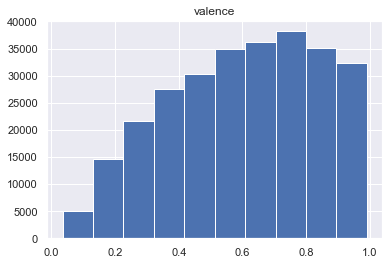

In [11]:
bb_decade_features.hist(column='valence');

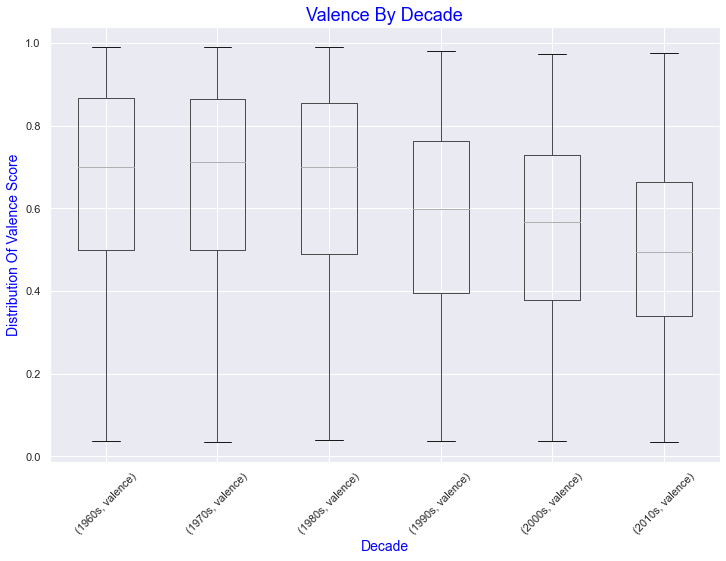

In [16]:
bb_decade_features.groupby('Decade').boxplot(subplots=False, rot=45, column='valence')
plt.title("Valence By Decade", fontsize=18, color='Blue')
plt.xlabel("Decade", fontsize=14, color='Blue')
plt.ylabel("Distribution Of Valence Score", fontsize=14, color='Blue')
sns.set(rc = {'figure.figsize':(12,8)})
plt.savefig('Valence_By_Decade_Boxplot.png');

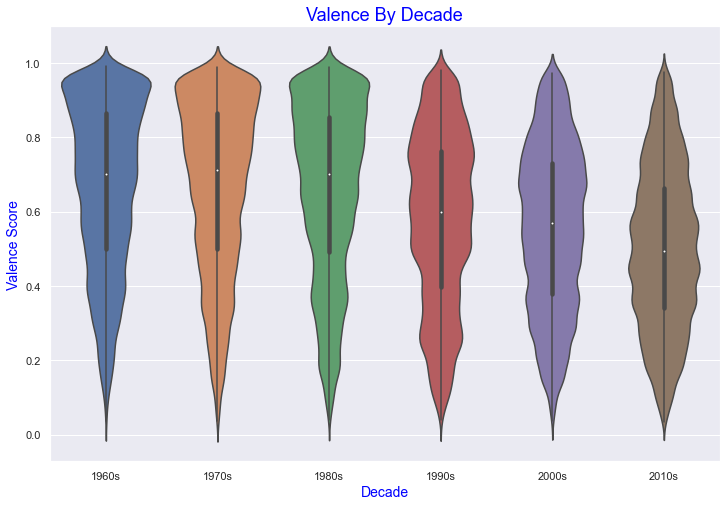

In [15]:
sns.violinplot(x='Decade', y='valence', data=bb_decade_features)
plt.title("Valence By Decade", fontsize=18, color='Blue')
plt.xlabel("Decade", fontsize=14, color='Blue')
plt.ylabel("Valence Score", fontsize=14, color='Blue')
sns.set(rc = {'figure.figsize':(12,8)})
plt.savefig('Valence_By_Decade_Violin.png');

In [18]:
Songs_Titled_Happy = bb_decade_features[bb_decade_features['Song_x']=='Happy']
Songs_Titled_Happy.shape

(157, 32)

In [19]:
Unique_Happy = Songs_Titled_Happy.drop_duplicates(subset='Performer_x')
Unique_Happy.shape

(13, 32)

In [20]:
Unique_Happy.iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Decade,Performer_y,Song_y,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
3810,http://www.billboard.com/charts/hot-100/1968-07-27,1968-07-27,79,Happy,Nancy Sinatra,HappyNancy Sinatra,1,NaN,79,1,1960s,Nancy Sinatra,Happy,"['adult standards', 'brill building pop', 'folk rock', 'lounge']",72WBu3udxgfDrCpjq02k5U,https://p.scdn.co/mp3-preview/55201558d1e703d4a20238d2f534805e16e67e82?cid=b8d3901151d34489a160e3cf0ab1fa94,150790.0,0.0,Nancy,0.716,0.529,5.0,-10.414,1.0,0.0764,0.227,0.000000,0.1060,0.799,122.522,4.0,15.0
20627,http://www.billboard.com/charts/hot-100/1967-07-15,1967-07-15,96,Happy,The Blades Of Grass,HappyThe Blades Of Grass,1,NaN,96,1,1960s,The Blades Of Grass,Happy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211502,http://www.billboard.com/charts/hot-100/2002-06-01,2002-06-01,77,Happy,Ashanti,HappyAshanti,1,NaN,77,1,2000s,Ashanti,Happy,"['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap', 'r&b', 'rap', 'urban contemporary']",6CbcdeTQKj0qTaZTt0xkdk,NaN,262226.0,1.0,Ashanti,0.717,0.508,7.0,-6.392,0.0,0.0290,0.263,0.000004,0.0620,0.681,89.473,4.0,62.0
275060,http://www.billboard.com/charts/hot-100/2014-01-18,2014-01-18,98,Happy,Pharrell Williams,HappyPharrell Williams,1,NaN,98,1,2010s,Pharrell Williams,Happy,"['dance pop', 'pop', 'pop rap']",60nZcImufyMA1MKQY3dcCH,https://p.scdn.co/mp3-preview/67cffdcb7e3c82a5eb2e5f0bb235d377ccc94eeb?cid=b8d3901151d34489a160e3cf0ab1fa94,232720.0,0.0,G I R L,0.647,0.822,5.0,-4.662,0.0,0.1830,0.219,0.000000,0.0908,0.962,160.019,4.0,79.0


In [21]:
#Play "Pharrell Williams ~ Happy"
import webbrowser
PW_Happy_URL = Unique_Happy['spotify_track_preview_url'].iloc[-1]
webbrowser.open_new(PW_Happy_URL)

True

In [24]:
import urllib.request
urllib.request.urlretrieve(PW_Happy_URL, "Happy.mp3")

('Happy.mp3', <http.client.HTTPMessage at 0x7fd5b73632b0>)

In [22]:
PW_Happy_URL

'https://p.scdn.co/mp3-preview/67cffdcb7e3c82a5eb2e5f0bb235d377ccc94eeb?cid=b8d3901151d34489a160e3cf0ab1fa94'

In [ ]:
#Some experimentation with Jointplots & Pairplot, but not yet sure where to use them. 

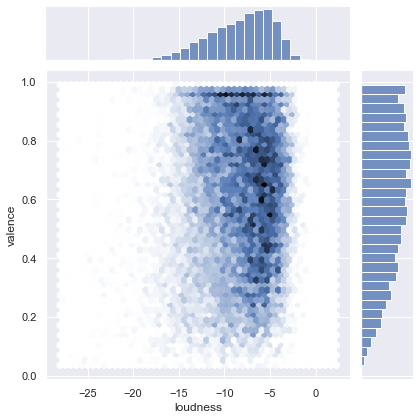

In [66]:
sns.jointplot(x=bb_decade_features['loudness'], y=bb_decade_features['valence'], kind='hex', marginal_kws=dict(bins=30, fill=True))

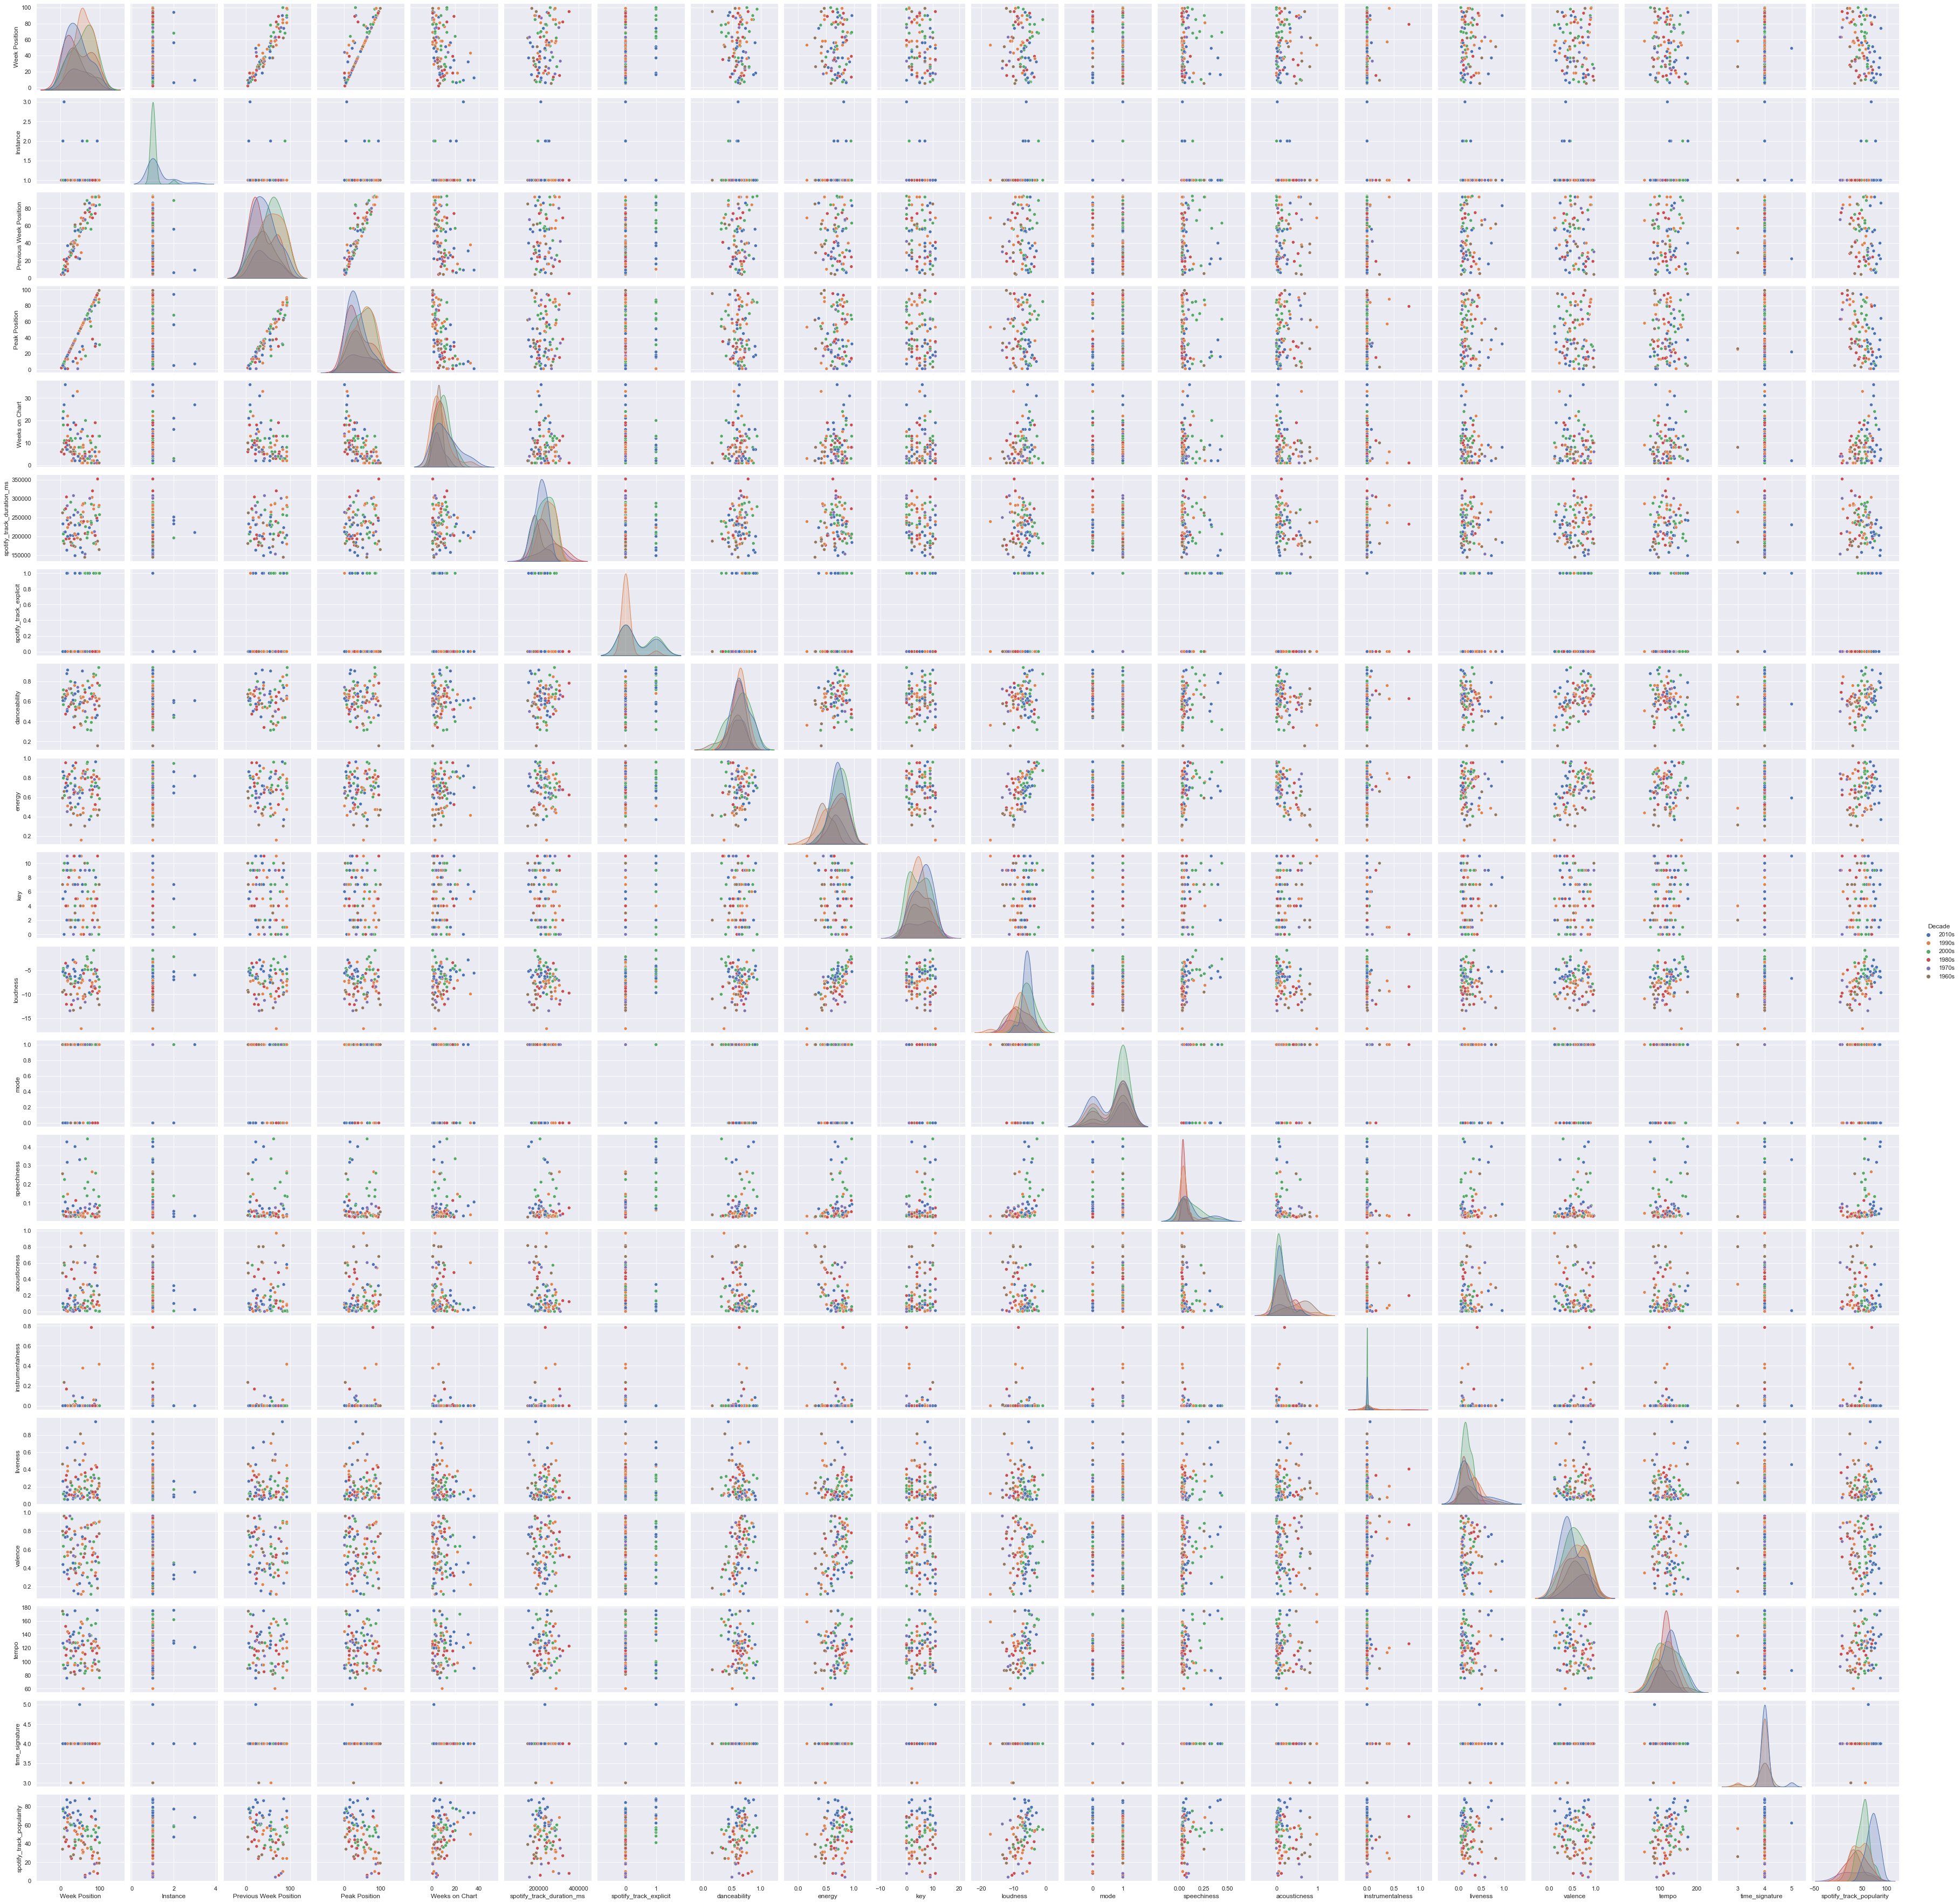

In [70]:
sns.pairplot(bb_decade_features.sample(100), hue='Decade', diag_kind='kde');